<a href="https://colab.research.google.com/github/Aayushee07/AdsLabs/blob/main/aayushi_ads_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ADS LAB 7**

Dataset : [link](https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python/notebook#9.-Stationary-and-Non-Stationary-Time-Series-)

In [101]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
path = '/content/AirPassengers.csv'

df = pd.read_csv(path)

df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [106]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000000143
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  144 non-null    object
 1   Number of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


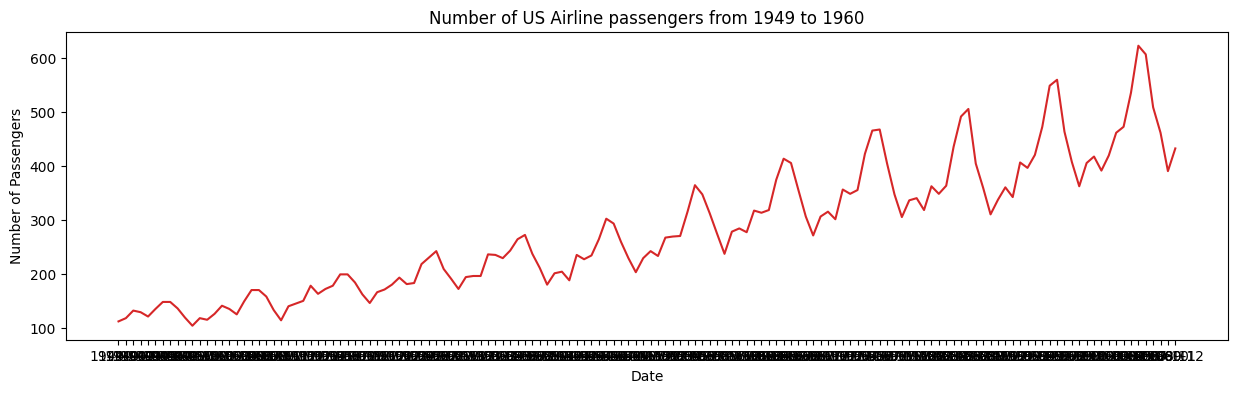

In [98]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

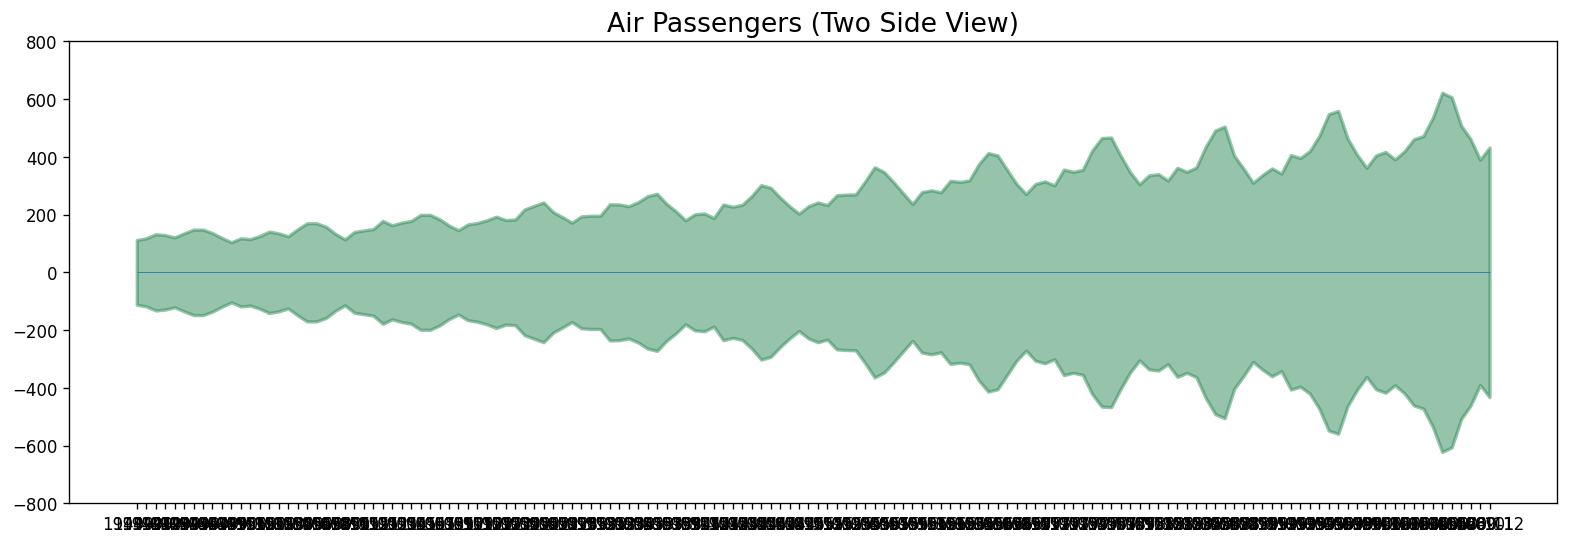

In [86]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

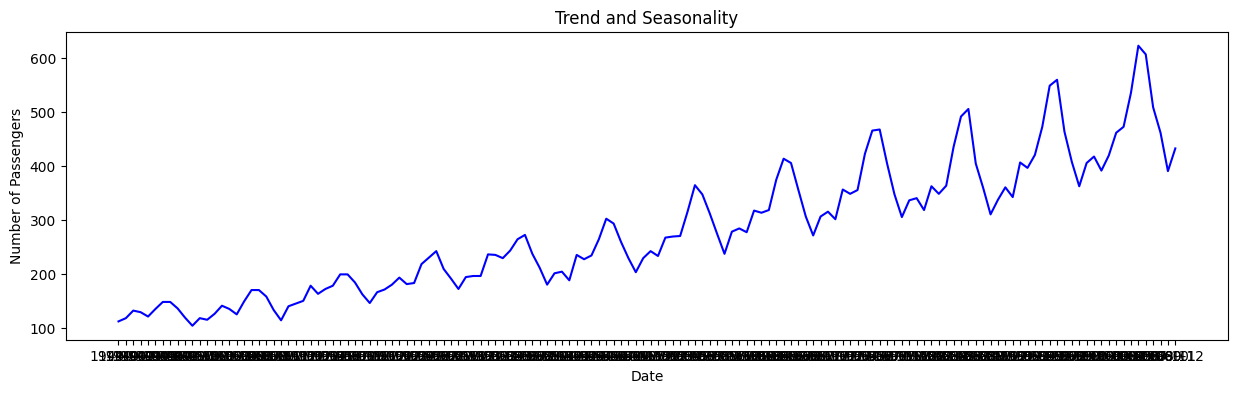

In [87]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

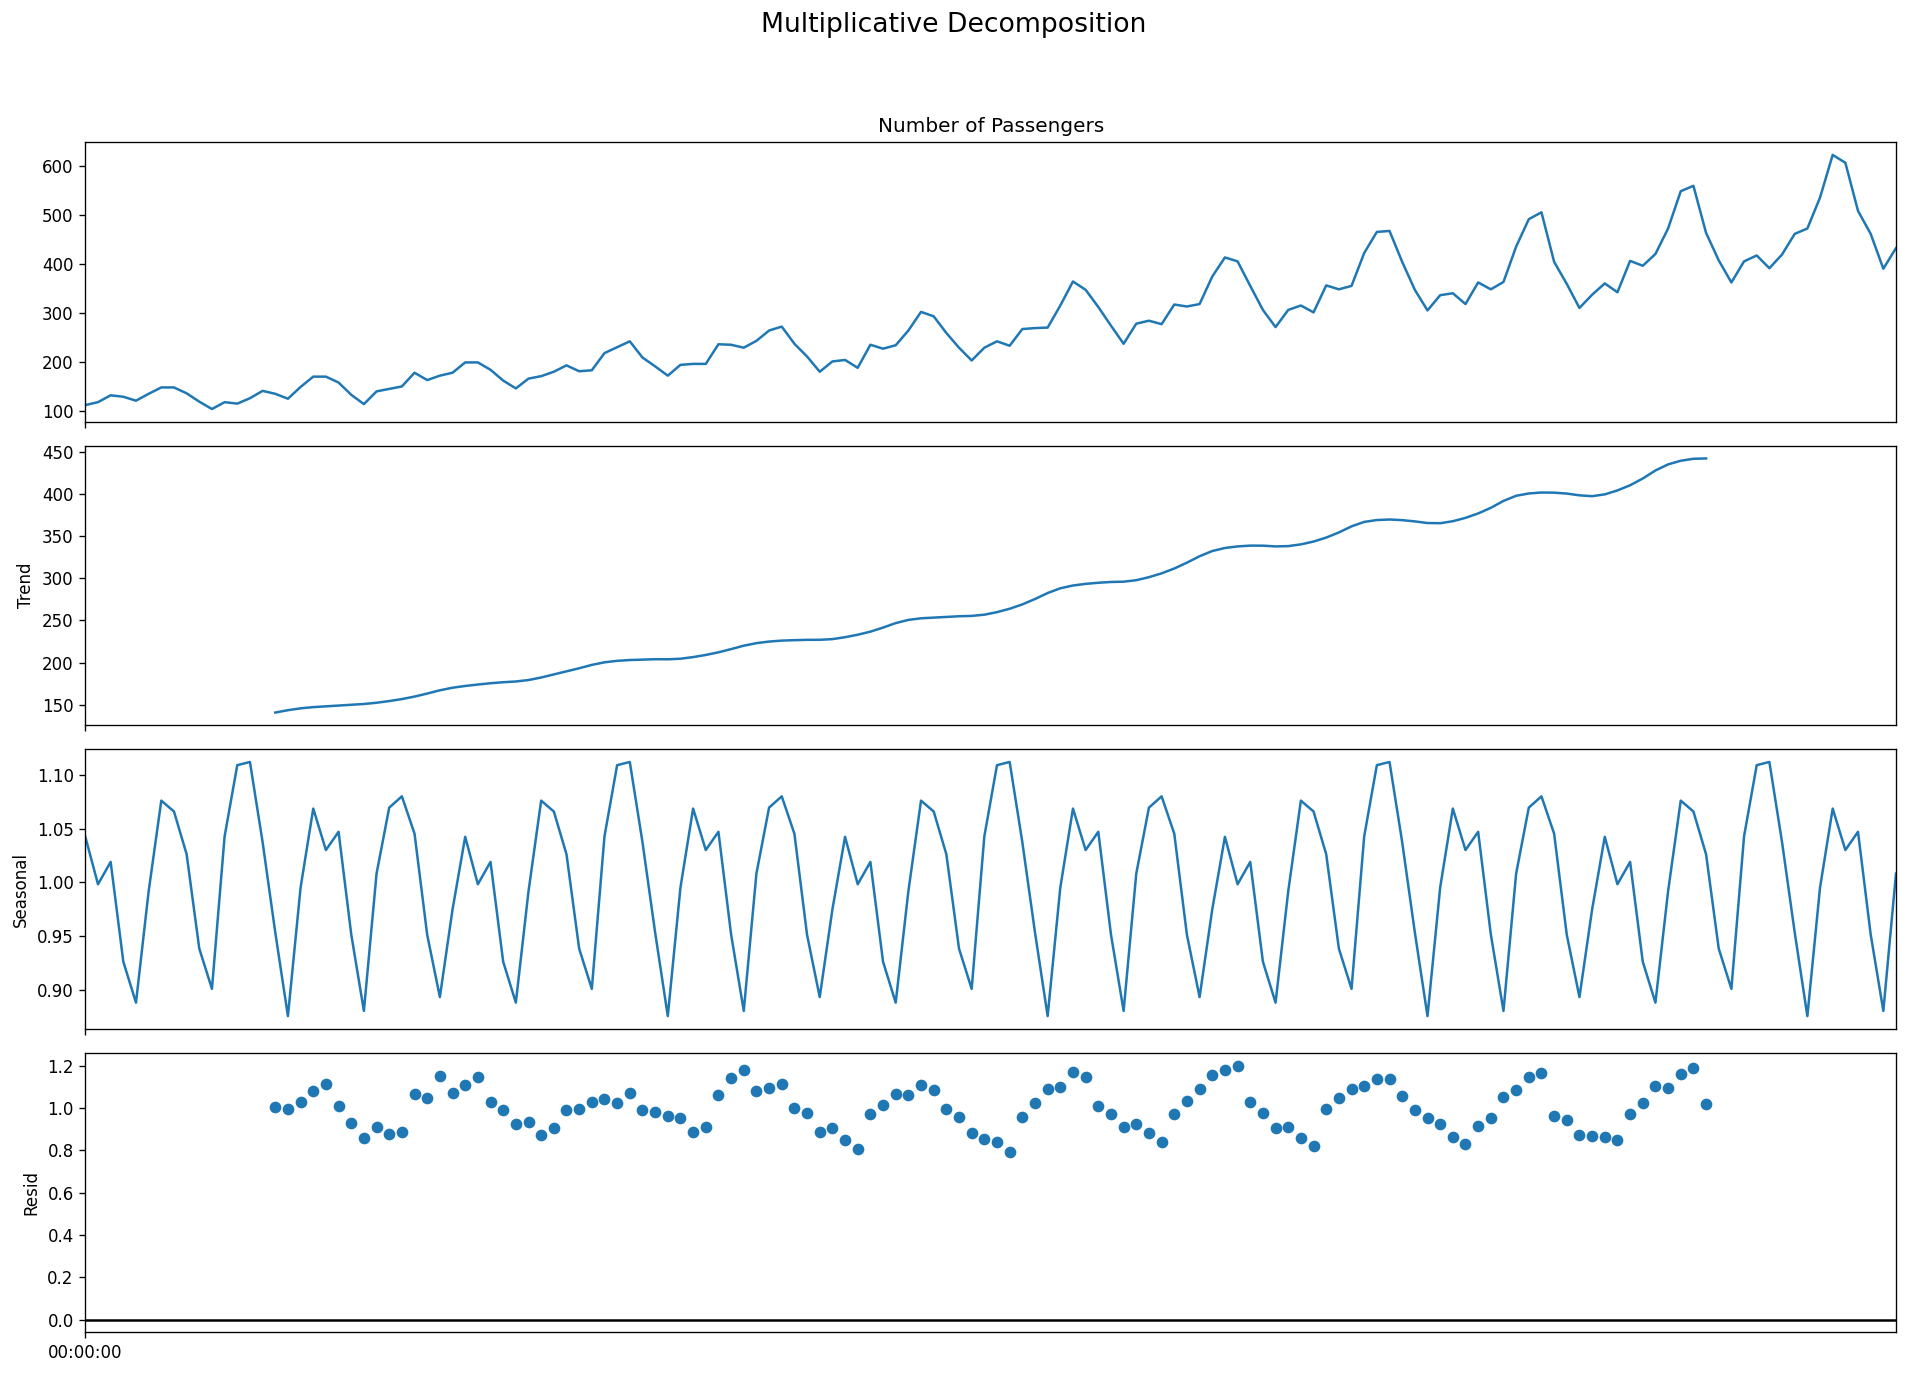

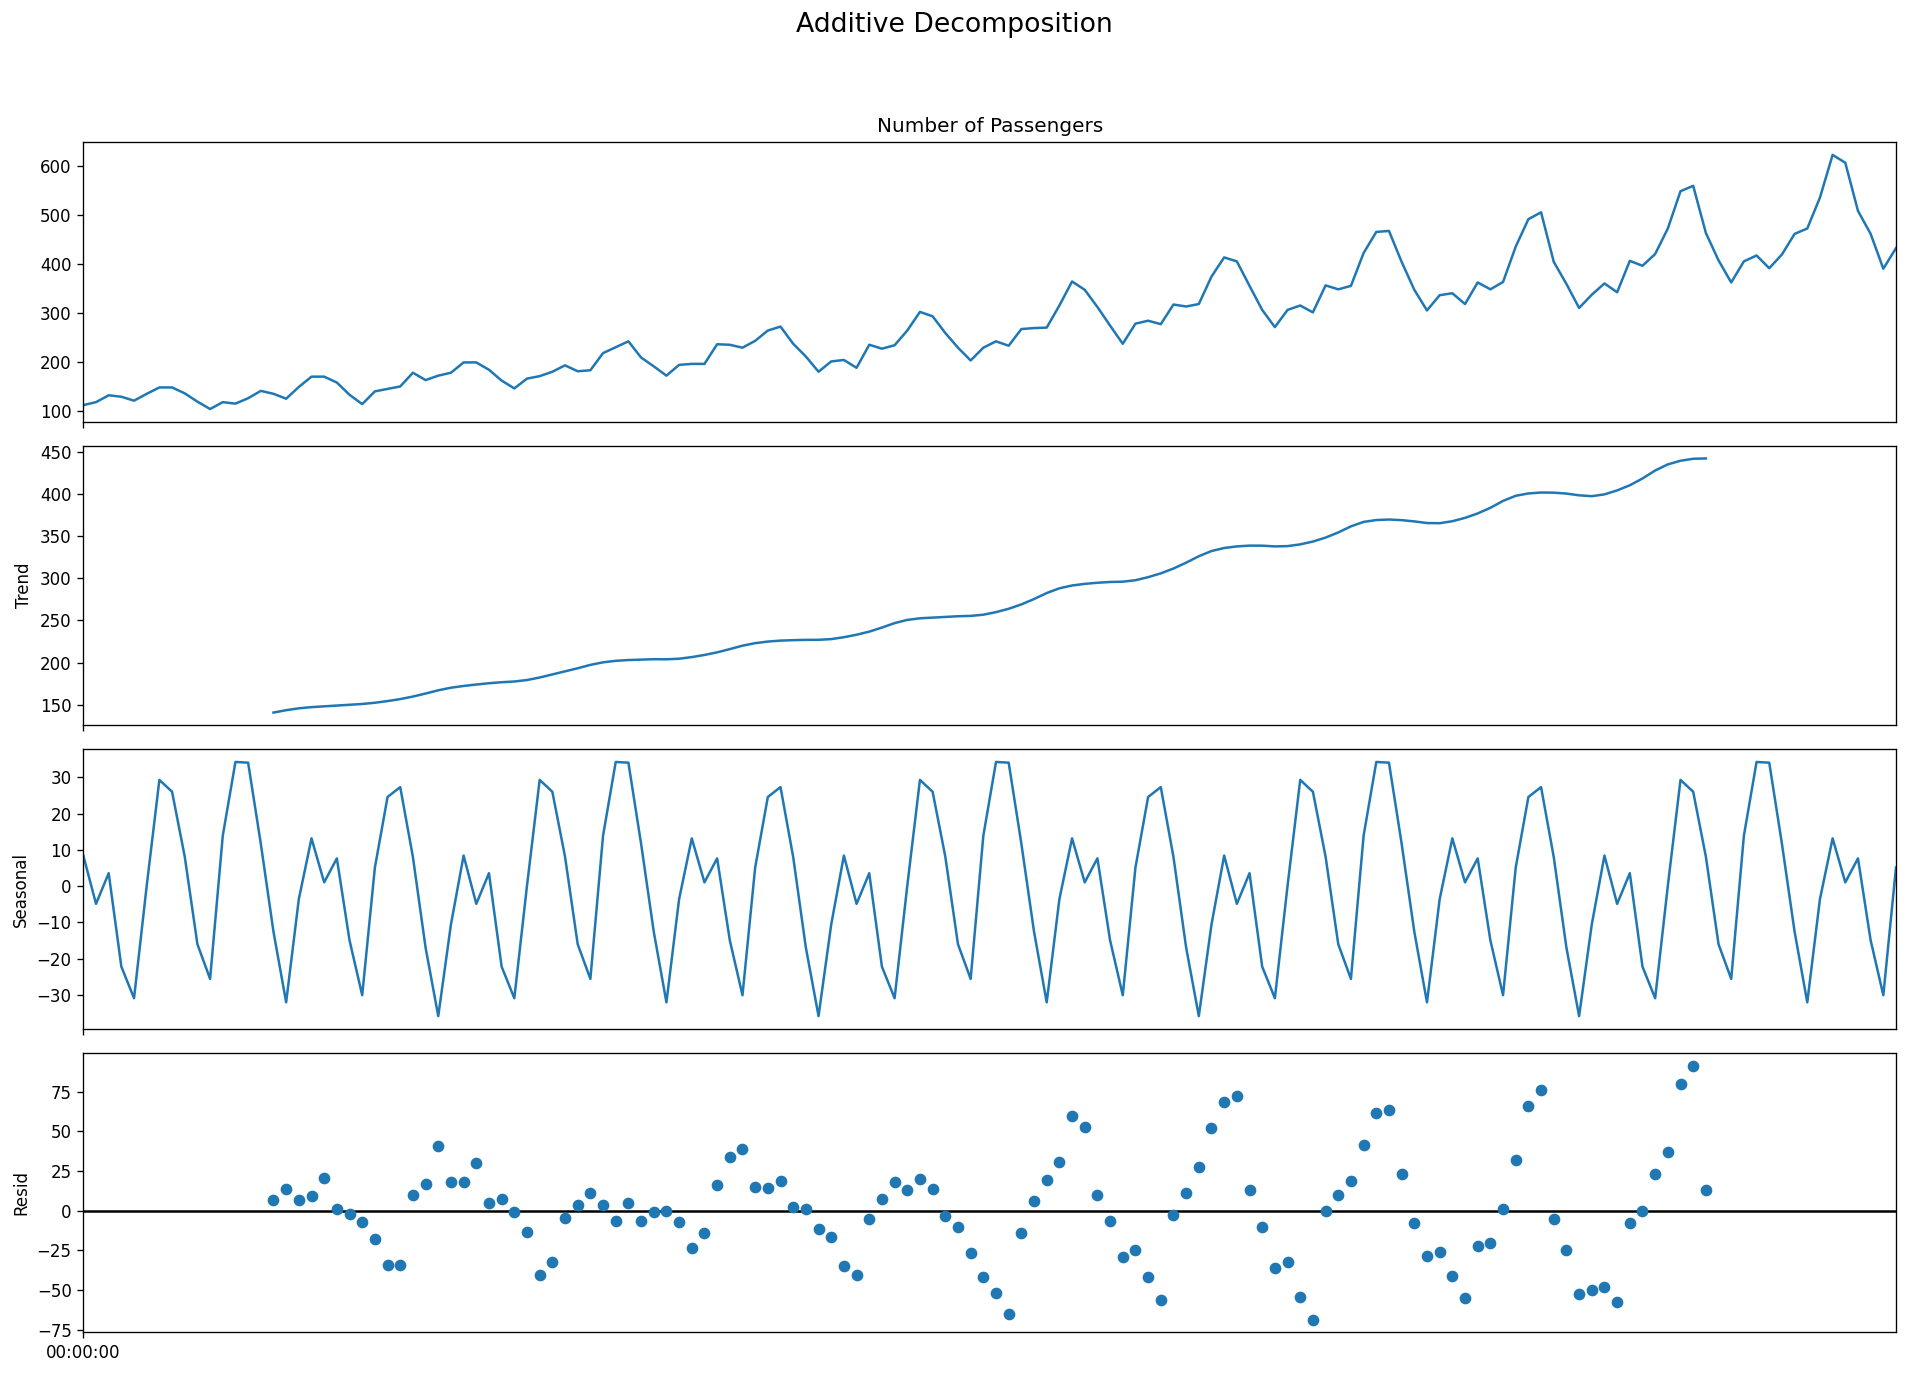

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [104]:
# Convert index to datetime if not already done
df.index = pd.to_datetime(df.index)
print(df)

                                  Date  Number of Passengers
1970-01-01 00:00:00.000000000  1949-01                   112
1970-01-01 00:00:00.000000001  1949-02                   118
1970-01-01 00:00:00.000000002  1949-03                   132
1970-01-01 00:00:00.000000003  1949-04                   129
1970-01-01 00:00:00.000000004  1949-05                   121
...                                ...                   ...
1970-01-01 00:00:00.000000139  1960-08                   606
1970-01-01 00:00:00.000000140  1960-09                   508
1970-01-01 00:00:00.000000141  1960-10                   461
1970-01-01 00:00:00.000000142  1960-11                   390
1970-01-01 00:00:00.000000143  1960-12                   432

[144 rows x 2 columns]


**Seasonality test**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

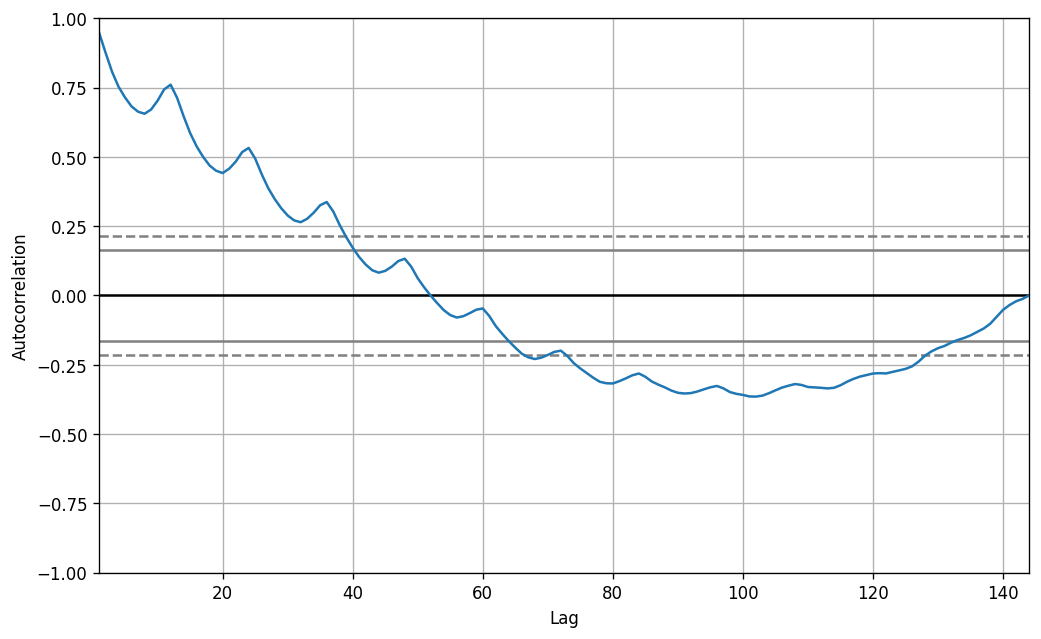

In [91]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

In [37]:
pip install pmdarima


**Model Training**

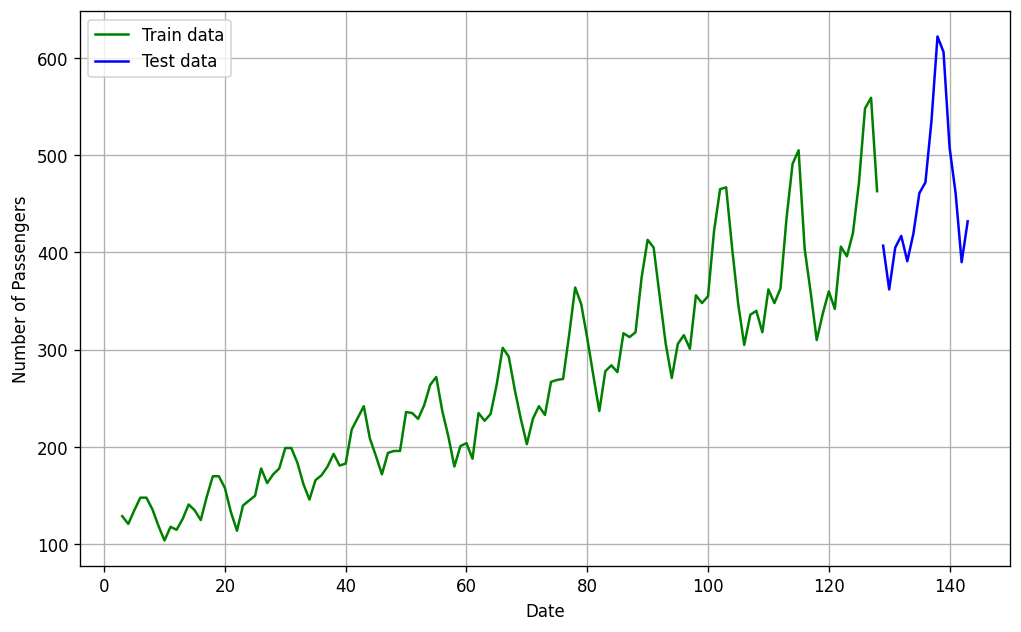

In [107]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# # Convert index to datetime if not already done
# df.index = pd.to_datetime(df.index)

# Split data into train and test sets
train_data = df[3:int(len(df)*0.9)]  # Training data from index 3 to 90% of the length
test_data = df[int(len(df)*0.9):]  # Testing data from 90% of the length to the end

# Plotting (optional)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(train_data.index, train_data['Number of Passengers'], 'green', label='Train data')
plt.plot(test_data.index, test_data['Number of Passengers'], 'blue', label='Test data')
plt.legend()
plt.show()






**Finding the p,d,q values**

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

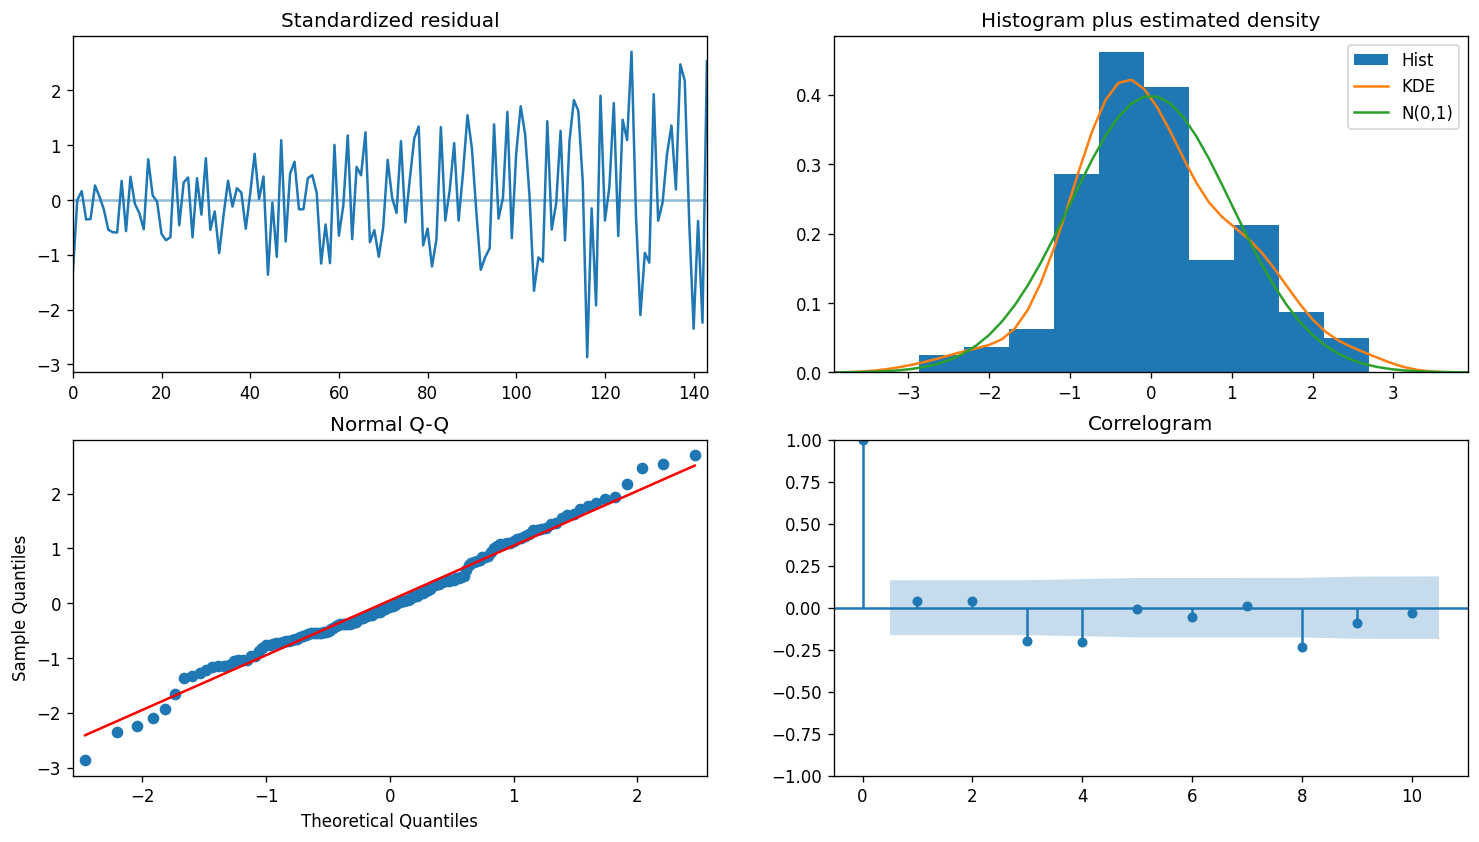

In [108]:
# Fit auto ARIMA model
model_autoARIMA = auto_arima(df['Number of Passengers'], start_p=0, start_q=0,
                             test='adf',  # use adftest to find optimal 'd'
                             max_p=3, max_q=3,  # maximum p and q
                             m=1,  # frequency of series
                             d=None,  # let model determine 'd'
                             seasonal=False,  # No Seasonality
                             start_P=0,
                             D=0,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

# Print summary
print(model_autoARIMA.summary())

# Plot diagnostics (optional)
model_autoARIMA.plot_diagnostics(figsize=(15, 8))
plt.show()

**Forecasting**

<ipython-input-109-4cfa32239e84>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["predicted_passengers"] = forecast


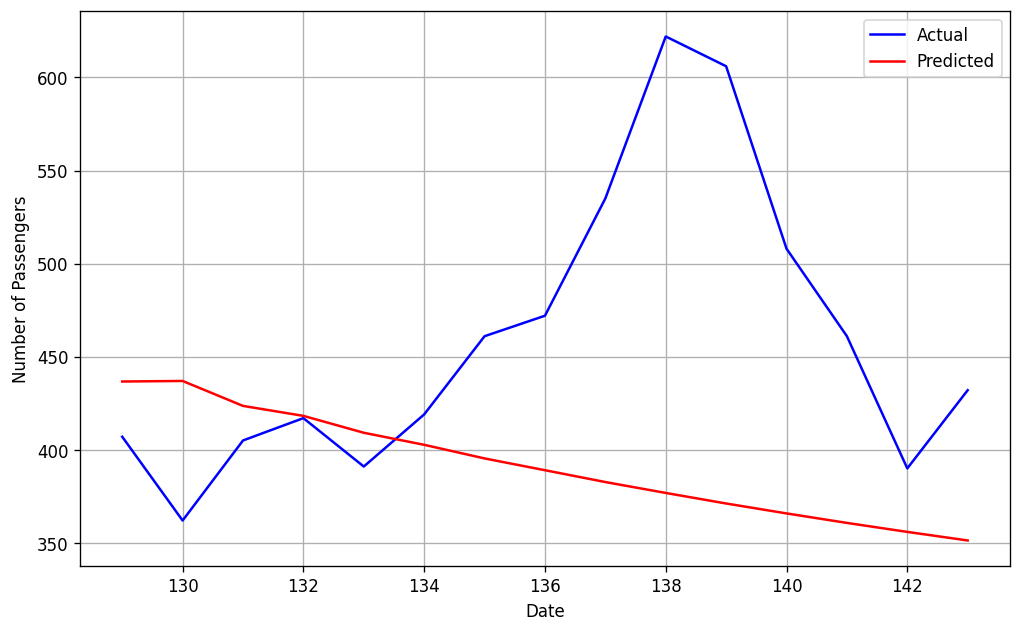

In [109]:
# Assuming the columns are named "Date" and "No. of Passengers"
date = pd.to_datetime(train_data["Date"])
passengers = train_data["Number of Passengers"]

# Fit ARIMA model with identified parameters (replace with your identified p, d, and q)
model = ARIMA(passengers, order=(2, 0, 1))
model_fit = model.fit()

# Generate forecasts for the same dates as the test data
forecast = model_fit.forecast(steps=len(test_data))

# Create a new column in the test data for predicted values
test_data["predicted_passengers"] = forecast

# Plot actual and predicted values for the test data
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(test_data.index, test_data['Number of Passengers'], 'blue', label='Actual')
plt.plot(test_data.index, test_data['predicted_passengers'], 'red', label='Predicted')
plt.legend()
plt.show()

In [110]:
forecast = model_fit.forecast(steps=20)

print("Predicted number of passengers for the next 20 months:")
print(forecast)


Predicted number of passengers for the next 20 months:
129    436.670947
130    436.959713
131    423.565319
132    418.212441
133    409.139541
134    402.666013
135    395.350803
136    389.024002
137    382.671161
138    376.814912
139    371.149248
140    365.816725
141    360.718839
142    355.888299
143    351.287980
144    346.919426
145    342.764214
146    338.815572
147    335.061264
148    331.492787
Name: predicted_mean, dtype: float64
